In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [2]:
df = pd.read_csv('Dasatest_N.csv')
df['Month'] = pd.to_datetime(df.Month , format = '%d-%m-%Y')
data = df.drop(['Month'], axis=1)
data.index = df.Month
cols = data.columns
data.index.freq = 'MS'

In [4]:
# df.plot()
# plt.show()
# print(data.head())
data_1 = data.iloc[:,1000]
data_1 = data_1
print(data_1)

Month
2013-01-01    0.479931
2013-02-01    0.509692
2013-03-01    0.718891
2013-04-01    0.758855
2013-05-01    0.681279
                ...   
2018-08-01    0.929804
2018-09-01    0.044350
2018-10-01    0.990239
2018-11-01    0.904882
2018-12-01    0.913983
Freq: MS, Name: Region 1001, Length: 72, dtype: float64


In [10]:
df_train = data_1.iloc[:-12]
df_test = data_1.iloc[-12:]

In [11]:
model = HWES(df_train, seasonal_periods=12,seasonal='mul')
fitted = model.fit()

In [12]:
# print(fitted.summary())

In [13]:
sales_forecast = fitted.forecast(steps=12)

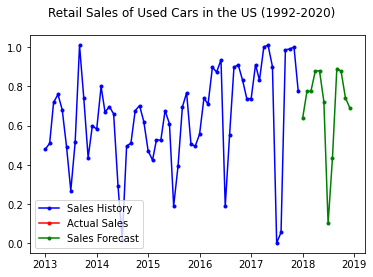

In [18]:
fig = plt.figure()
fig.suptitle('Retail Sales of Used Cars in the US (1992-2020)')
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
# future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='Sales Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

In [15]:
print(mean_absolute_percentage_error(df_test,sales_forecast))

10.044152914942464


In [342]:
prediction = np.zeros([15,3915])

In [356]:
for i in tqdm(range(3915)):
    data_train = np.array(data.iloc[:,i]) + 1000
    model = HWES(data_train, seasonal_periods=12,seasonal='mul',trend='add',damped_trend=True)
    fitted = model.fit()
    pred = fitted.forecast(steps=15)
    pred = np.array(pred) 
    prediction[:,i] = pred - 1000

100%|██████████████████████████████████████████████████████████████████████████████| 3915/3915 [07:25<00:00,  8.79it/s]


In [357]:
print(prediction)

[[0.26184014 0.22491314 0.30535469 ... 0.84911907 1.70373555 0.63478434]
 [0.27927514 0.25330886 0.32355435 ... 0.99365617 1.80662494 0.77388057]
 [0.3044825  0.30963691 0.36510496 ... 0.91127714 1.87369282 0.7139362 ]
 ...
 [0.27049125 0.23874762 0.32195477 ... 0.84381454 1.70802859 0.66882609]
 [0.28783988 0.26700312 0.33998859 ... 0.98902249 1.81072751 0.80755561]
 [0.31296179 0.32319277 0.38137538 ... 0.90723039 1.87761323 0.74724186]]


In [358]:
output = pd.DataFrame(prediction)
output.to_csv('submission_HWES_with_trend.csv')
print("Your submission was successfully saved!")

Your submission was successfully saved!
